In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle


In [ ]:
data = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
data.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No


In [ ]:
data.drop(['Date','Location'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.rename(columns ={'WindGustDir':'Wind_Dir'}, inplace=True)

In [ ]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Wind_Dir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
data1 = data[['Wind_Dir', 'RainToday', 'RainTomorrow']]

In [ ]:
data1.dropna(subset=['Wind_Dir'],inplace=True)
data1.dropna(subset=['RainToday'],inplace=True)
data1.dropna(subset=['RainTomorrow'],inplace=True)

In [ ]:
file = open('Rain.pkl', 'rb')
pre = pickle.load(file)

In [ ]:
data1.columns

Index(['Wind_Dir', 'RainToday', 'RainTomorrow'], dtype='object')

In [ ]:
data1.isnull().sum()

,0
Wind_Dir,0
RainToday,0
RainTomorrow,0


In [ ]:
a = pre.fit_transform(data1)
data1 = pd.DataFrame(a,columns=data1.columns)

In [ ]:
data.drop(['Wind_Dir', 'RainToday', 'RainTomorrow'],axis=1,inplace=True)

In [ ]:
data3=pd.concat([data,data1], axis=1)

In [ ]:
data3.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Wind_Dir',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
data3.isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228
WindSpeed9am,1767
WindSpeed3pm,3062


In [ ]:
data3 = data3.dropna(subset = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Wind_Dir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Wind_Dir', 'RainToday', 'RainTomorrow'])

In [ ]:
data3.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Wind_Dir,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,ENE,SW,6.0,20.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,3.0,0.0,1.0
6050,18.4,28.9,0.0,14.8,13.0,37.0,SSE,SSE,19.0,19.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,11.0,1.0,0.0


In [ ]:
#datatypes is float will convert to int will doing train test split not here

In [ ]:
num_cols = data3.select_dtypes(include='number').columns
cat_cols = data3.select_dtypes(include = 'object').columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Wind_Dir', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
cat_cols

Index(['WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data3['WindDir9am'] = le.fit_transform(data3['WindDir9am'])
data3['WindDir3pm'] = le.fit_transform(data3['WindDir3pm'])

In [ ]:
num_cols = data3.select_dtypes(include='number').columns
cat_cols = data3.select_dtypes(include = 'object').columns
cat_cols

Index([], dtype='object')

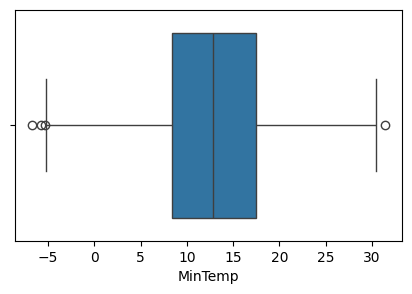

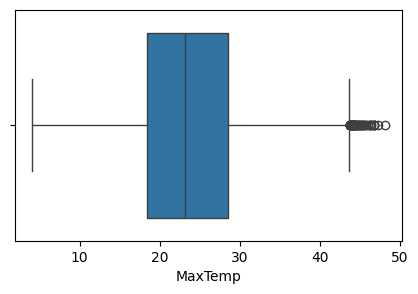

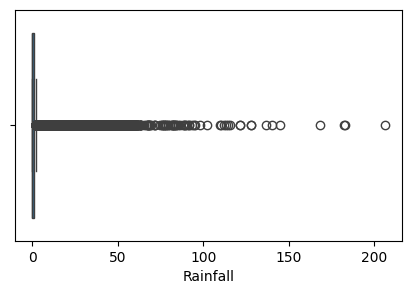

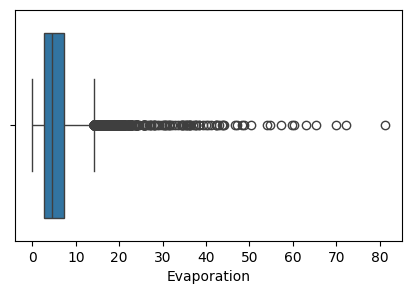

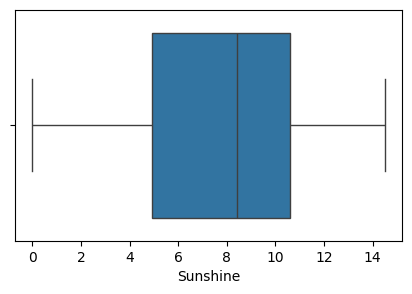

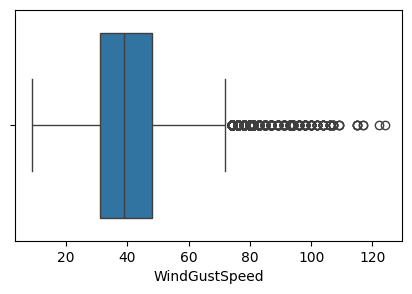

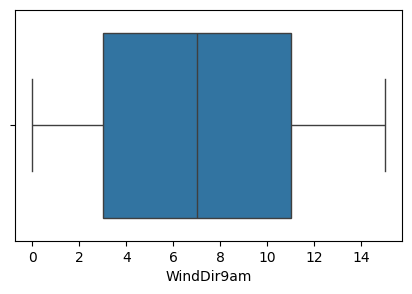

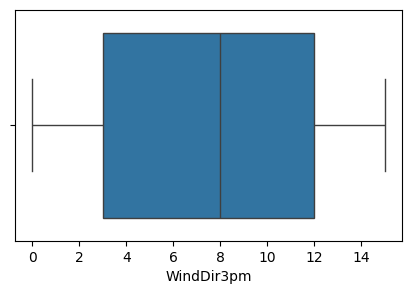

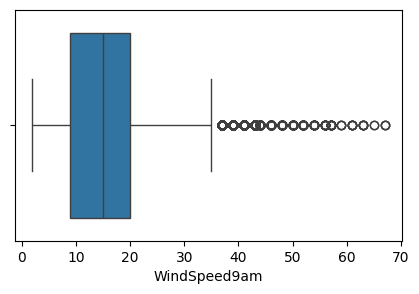

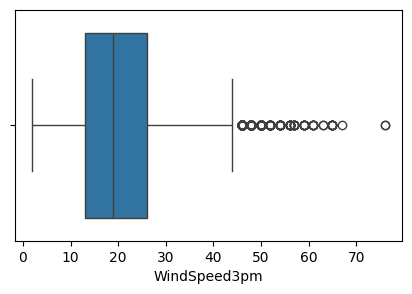

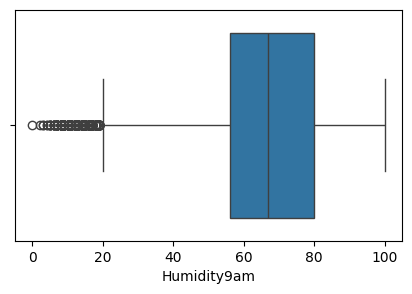

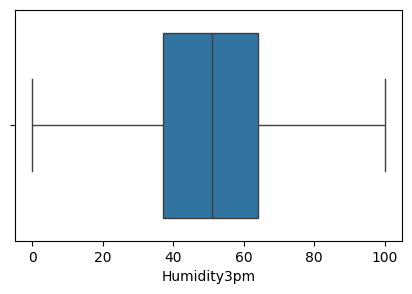

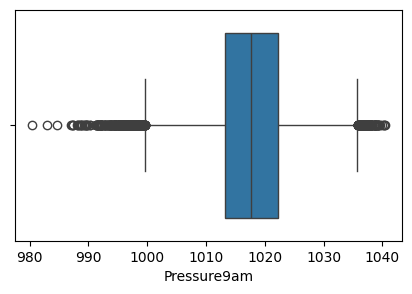

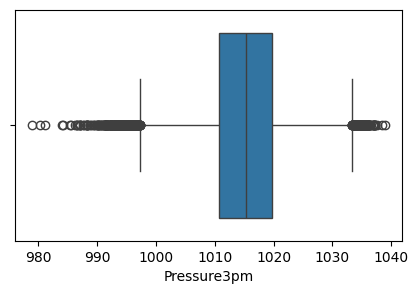

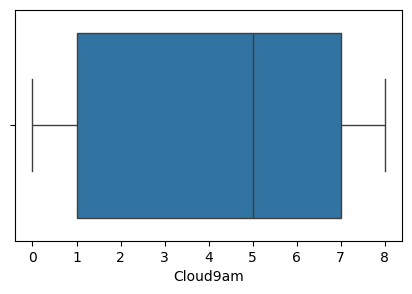

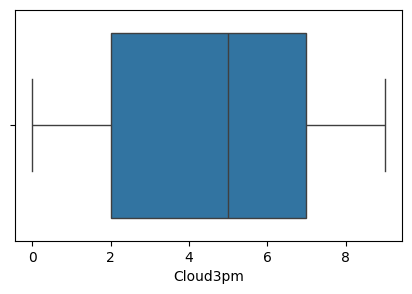

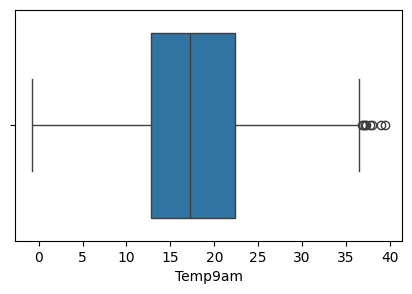

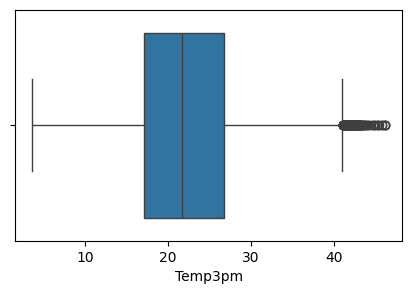

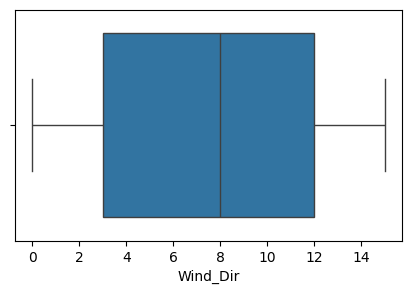

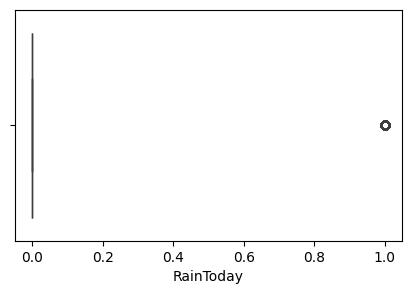

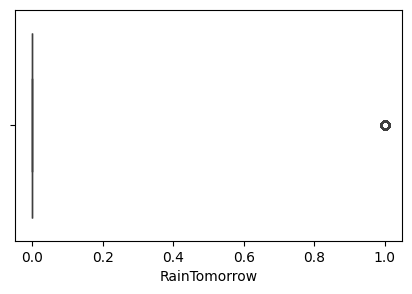

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,3))
  sns.boxplot(x=data3[i])

In [ ]:
#Outliers in a few columns

In [ ]:
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Wind_Dir',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
OL = [num_cols]
for b in OL:

  Q2 = data3[b].quantile(0.25)
  Q4 = data3[b].quantile(0.75)
  IQR = Q4 - Q2
  lower = Q2 - 1.5*IQR
  upper = Q4 + 1.5*IQR
  data3 = data3[(data3[b] >= lower) & (data3[b] <= upper)]
print(upper)
print(lower)

MinTemp            30.95
MaxTemp            43.00
Rainfall            0.00
Evaporation        14.40
Sunshine           17.05
WindGustSpeed      65.00
WindDir9am         20.50
WindDir3pm         23.00
WindSpeed9am       34.00
WindSpeed3pm       40.50
Humidity9am       100.50
Humidity3pm        92.00
Pressure9am      1034.80
Pressure3pm      1032.15
Cloud9am           13.50
Cloud3pm           13.50
Temp9am            36.15
Temp3pm            40.55
Wind_Dir           24.00
RainToday           0.00
RainTomorrow        0.00
dtype: float64
MinTemp            -5.45
MaxTemp             7.00
Rainfall            0.00
Evaporation        -3.20
Sunshine            1.45
WindGustSpeed       9.00
WindDir9am         -7.50
WindDir3pm         -9.00
WindSpeed9am       -6.00
WindSpeed3pm       -3.50
Humidity9am        24.50
Humidity3pm        -4.00
Pressure9am      1002.80
Pressure3pm       999.75
Cloud9am           -6.50
Cloud3pm           -6.50
Temp9am             0.55
Temp3pm             6.55
Wind_Dir  

In [ ]:
columns_to_check = ['Temp3pm', 'Temp9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm',
                    'Pressure9am', 'Pressure3pm', 'Rainfall', 'Evaporation', 'Sunshine']

for col in columns_to_check:
    Q1 = data3[col].quantile(0.25)
    Q3 = data3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data3 = data3[(data3[col] >= lower) & (data3[col] <= upper)]
    print(f"Outliers removed from {col}")


Outliers removed from Temp3pm
Outliers removed from Temp9am
Outliers removed from Humidity3pm
Outliers removed from WindSpeed9am
Outliers removed from WindSpeed3pm
Outliers removed from Pressure9am
Outliers removed from Pressure3pm
Outliers removed from Rainfall
Outliers removed from Evaporation
Outliers removed from Sunshine


<Axes: xlabel='Temp3pm'>

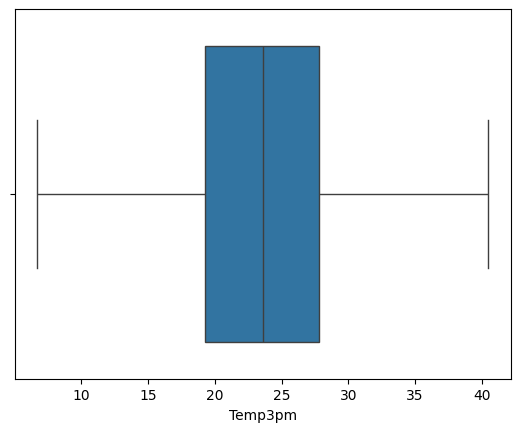

In [ ]:
sns.boxplot(x=data3['Temp3pm'])

If you want to do each seperatly only then see below code

In [ ]:
Q1 = data3['Temp9am'].quantile(0.25)
Q3 = data3['Temp9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Temp9am'] >= lower) & (data3['Temp9am'] <= upper)]

In [ ]:
Q1 = data3['MinTemp'].quantile(0.25)
Q3 = data3['MinTemp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['MinTemp'] >= lower) & (data3['MinTemp'] <= upper)]

In [ ]:
Q1 = data3['MaxTemp'].quantile(0.25)
Q3 = data3['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['MaxTemp'] >= lower) & (data3['MaxTemp'] <= upper)]

In [ ]:
Q1 = data3['Rainfall'].quantile(0.25)
Q3 = data3['Rainfall'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Rainfall'] >= lower) & (data3['Rainfall'] <= upper)]

In [ ]:
Q1 = data3['Evaporation'].quantile(0.25)
Q3 = data3['Evaporation'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Evaporation'] >= lower) & (data3['Evaporation'] <= upper)]

In [ ]:
Q1 = data3['WindGustSpeed'].quantile(0.25)
Q3 = data3['WindGustSpeed'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['WindGustSpeed'] >= lower) & (data3['WindGustSpeed'] <= upper)]

In [ ]:
Q1 = data3['WindSpeed9am'].quantile(0.25)
Q3 = data3['WindSpeed9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['WindSpeed9am'] >= lower) & (data3['WindSpeed9am'] <= upper)]

In [ ]:
Q1 = data3['WindSpeed3pm'].quantile(0.25)
Q3 = data3['WindSpeed3pm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['WindSpeed3pm'] >= lower) & (data3['WindSpeed3pm'] <= upper)]

In [ ]:
data3.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Wind_Dir',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
Q1 = data3['Humidity9am'].quantile(0.25)
Q3 = data3['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Humidity9am'] >= lower) & (data3['Humidity9am'] <= upper)]

In [ ]:
Q1 = data3['Pressure9am'].quantile(0.25)
Q3 = data3['Pressure9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Pressure9am'] >= lower) & (data3['Pressure9am'] <= upper)]

In [ ]:
Q1 = data3['Pressure3pm'].quantile(0.25)
Q3 = data3['Pressure3pm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data3[(data3['Pressure3pm'] >= lower) & (data3['Pressure3pm'] <= upper)]

In [ ]:
x = data3.drop('RainTomorrow',axis=1)
y = data3['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
# Use SMOTE or sample weights

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion Matrix:
[[5729   44]
 [1640   41]]

Accuracy: 0.7740810303192917
F1 Score: 0.0464326160815402
Precision: 0.4823529411764706
Recall: 0.024390243902439025


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dt.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
acc1

0.688623557821304

In [ ]:
precision_score(y_test,y_pred1)

0.31838819523269013

In [ ]:
recall_score(y_test,y_pred1)

0.33372992266508034

In [ ]:
f1_score(y_test,y_pred1)

0.3258785942492013

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,5,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],

}

tree_clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree_clf,params,scoring = 'f1', cv=3,n_jobs=-1, verbose =2)
tree_cv.fit(x_train,y_train)

best_params = tree_cv.best_params_
print(f"best param:{best_params})")

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
best param:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'})


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=8,splitter='random')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=8, splitter='random')

In [ ]:
y_hat1 = dt1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_hat1)

0.7715320633217064

In [ ]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      5773
         1.0       0.47      0.12      0.20      1681

    accuracy                           0.77      7454
   macro avg       0.63      0.54      0.53      7454
weighted avg       0.72      0.77      0.72      7454



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.7773007781057151

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      5773
         1.0       0.52      0.13      0.21      1681

    accuracy                           0.78      7454
   macro avg       0.66      0.55      0.54      7454
weighted avg       0.73      0.78      0.72      7454



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start =200, stop=2000, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,100,num=10)]
min_samples_leaf= [1,2,4]
min_samples_split = [2,5,10]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'bootstrap':bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator = rf_clf, scoring ='accuracy',
                           param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_cv.fit(x_train,y_train)

best_params = rf_cv.best_params_
print(f"best param:{best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best param:{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True})


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 50, bootstrap = True)
rf_clf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [ ]:
y_pred3 = rf_clf2.predict(x_test)
accura= accuracy_score(y_test,y_pred3)
accura

0.7798497451033003

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_preds1 =gbm.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_preds1))

0.7766299973168769


In [ ]:
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      5773
         1.0       0.53      0.08      0.14      1681

    accuracy                           0.78      7454
   macro avg       0.66      0.53      0.51      7454
weighted avg       0.73      0.78      0.71      7454

